# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %matplotlib notebook

# 1) seu código aqui
sinasc = pd.read_csv('../../modulo_5_limpeza_e_preparacao_de_dados/Tarefa 1/SINASC_RO_2019.csv')

# removendo duplicadas
sinasc.drop_duplicates().shape

# selecionando colunas de interesse
sinasc = sinasc[["APGAR5", "GESTACAO", "PESO", "SEXO"]]

sinasc = sinasc[~sinasc["APGAR5"].isna()]
sinasc = sinasc[~sinasc["GESTACAO"].isna()]
# removendo as linhas não preenchidas
sinasc.head(n=10)

,APGAR5,GESTACAO,PESO,SEXO
0,10.0,37 a 41 semanas,3685,Masculino
1,9.0,37 a 41 semanas,3055,Feminino
2,10.0,37 a 41 semanas,3460,Feminino
3,10.0,37 a 41 semanas,2982,Feminino
4,10.0,37 a 41 semanas,3310,Feminino
5,10.0,37 a 41 semanas,2740,Masculino
6,10.0,37 a 41 semanas,3158,Feminino
7,10.0,37 a 41 semanas,3192,Feminino
8,9.0,37 a 41 semanas,3570,Masculino
9,10.0,37 a 41 semanas,3900,Feminino


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [84]:
sinasc.loc[sinasc["APGAR5"] <= 3, "APGAR5_CAT"] = "asfixia grave"
sinasc.loc[(sinasc["APGAR5"] > 4) & (sinasc["APGAR5"] <= 5),
           "APGAR5_CAT"] = "asfixia moderada"
sinasc.loc[(sinasc["APGAR5"] > 6) & (sinasc["APGAR5"] <= 7),
           "APGAR5_CAT"] = "asfixia leve"
sinasc.loc[(sinasc["APGAR5"] >= 8), "APGAR5_CAT"] = "normal"
sinasc["APGAR5_CAT"].value_counts()

normal              25274
asfixia leve          234
asfixia grave          68
asfixia moderada       40
Name: APGAR5_CAT, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

<Axes: xlabel='APGAR5_CAT', ylabel='SEXO'>

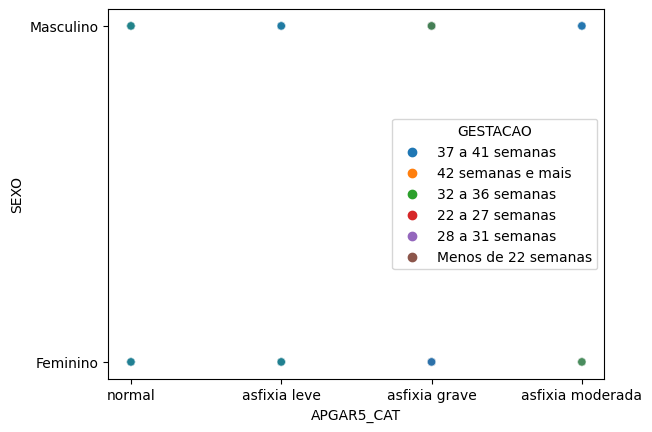

In [85]:
sns.scatterplot(x = 'APGAR5_CAT'
                , y = 'SEXO'
                , data = sinasc
                , alpha = .5
                , hue = 'GESTACAO'
               )

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [86]:
tabela = pd.crosstab(sinasc["GESTACAO"], sinasc["APGAR5_CAT"])
tabela.head(n=10)

APGAR5_CAT,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,21,10,0,51
28 a 31 semanas,3,11,7,129
32 a 36 semanas,8,56,11,2134
37 a 41 semanas,33,151,21,22266
42 semanas e mais,1,5,1,690
Menos de 22 semanas,2,1,0,4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [87]:
tabela_pctlin = tabela.div(tabela.sum(axis = 1), axis = 0)
tabela_pctlin

APGAR5_CAT,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,0.256098,0.121951,0.000000,0.621951
28 a 31 semanas,0.020000,0.073333,0.046667,0.860000
32 a 36 semanas,0.003622,0.025351,0.004980,0.966048
37 a 41 semanas,0.001469,0.006720,0.000935,0.990877
42 semanas e mais,0.001435,0.007174,0.001435,0.989957
Menos de 22 semanas,0.285714,0.142857,0.000000,0.571429


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Axes: xlabel='GESTACAO'>

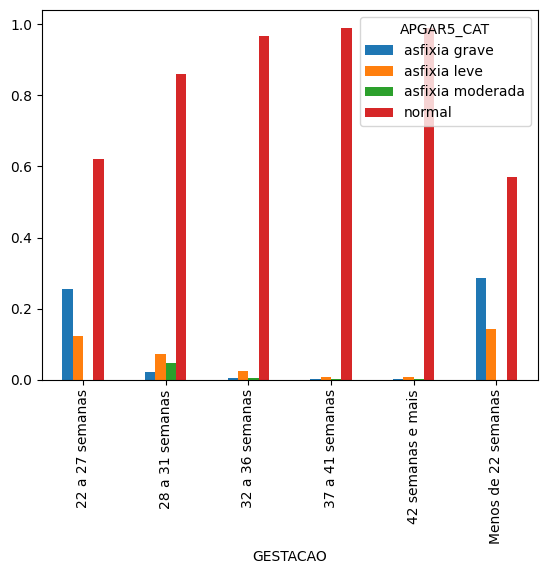

In [88]:
tabela_pctlin.plot.bar()

Segundo a observação do gráfico, a partir da 37 semanas o APGAR5 normal ocorre com
mais frequência e as outras categorizações tem níveis muito baixos, logo, indica que 
o recém nascido é mais saudável e que o tempo de 37 semanas indica uma melhor gestação.

O conjunto de dados corrobora com a afirmação dos médicos.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<Axes: xlabel='APGAR5_CAT', ylabel='PESO'>

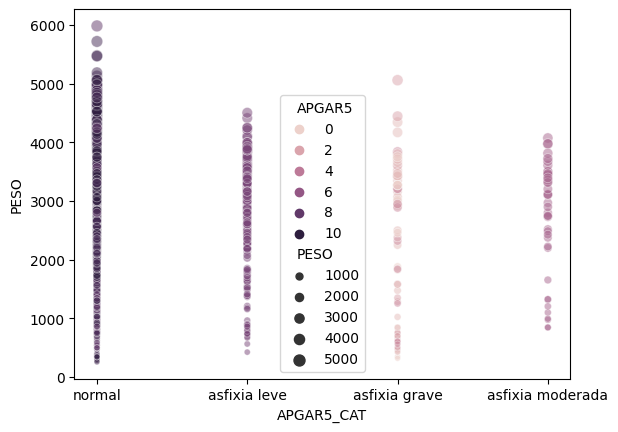

In [89]:
sns.scatterplot(x = 'APGAR5_CAT'
                , y = 'PESO'
                , data = sinasc
                , alpha = .5
                , hue = 'APGAR5'
                , size = 'PESO'
               )

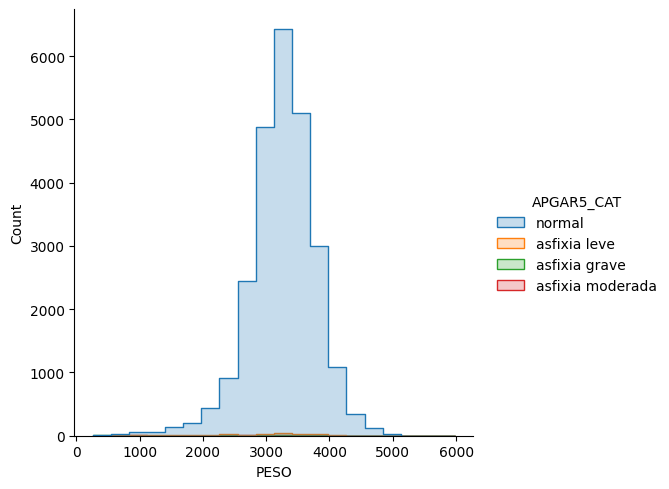

In [90]:
sns.displot(data = sinasc
            ,x = 'PESO'
            ,hue = 'APGAR5_CAT'
            ,bins = 20
            ,element = 'step'
           )

Segundo o gráfico displot, é possível perceber que os bebês entre 3 e 3.5 quilos possuem uma
avaliação melhor no APGAR5.